In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This Notebook is to clean a dataset and see how many values are left if the dataset is filtered by the -9, -8, and -7 conditions as per the Heloc Data Dictionary

In [2]:
df = pd.read_csv('heloc_dataset_v1.csv')
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [27]:
#Check for Null Values
df.isna().any()

RiskPerformance                       False
ExternalRiskEstimate                  False
MSinceOldestTradeOpen                 False
MSinceMostRecentTradeOpen             False
AverageMInFile                        False
NumSatisfactoryTrades                 False
NumTrades60Ever2DerogPubRec           False
NumTrades90Ever2DerogPubRec           False
PercentTradesNeverDelq                False
MSinceMostRecentDelq                  False
MaxDelq2PublicRecLast12M              False
MaxDelqEver                           False
NumTotalTrades                        False
NumTradesOpeninLast12M                False
PercentInstallTrades                  False
MSinceMostRecentInqexcl7days          False
NumInqLast6M                          False
NumInqLast6Mexcl7days                 False
NetFractionRevolvingBurden            False
NetFractionInstallBurden              False
NumRevolvingTradesWBalance            False
NumInstallTradesWBalance              False
NumBank2NatlTradesWHighUtilizati

In [5]:
#encoding risk performance to binary, no null values in column.
df['RiskPerformance'].replace('Bad', 1, inplace= True)
df['RiskPerformance'].replace('Good', 0, inplace= True)

In [7]:
df.describe()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,0.521943,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,0.499542,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,0.000000,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,1.000000,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,1.000000,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,1.000000,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


In [23]:
df.describe()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.00000,9861.000000,...,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000
mean,0.520028,72.060440,195.765947,9.520535,78.744245,21.130413,0.580570,0.383734,92.35899,7.709157,...,34.593348,0.192475,1.455532,1.396714,34.084170,42.048981,3.919075,1.577021,0.560998,66.371768
std,0.499624,9.871795,101.913629,12.288235,33.904646,11.302849,1.238056,0.991851,11.76934,20.735160,...,17.907026,5.855050,2.135229,2.095491,29.202295,41.605560,3.342538,3.337305,2.601734,22.162833
min,0.000000,33.000000,-8.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.00000,-8.000000,...,0.000000,-8.000000,0.000000,0.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.000000
25%,0.000000,64.000000,131.000000,3.000000,57.000000,13.000000,0.000000,0.000000,89.00000,-7.000000,...,21.000000,0.000000,0.000000,0.000000,8.000000,-8.000000,2.000000,1.000000,0.000000,50.000000
50%,1.000000,72.000000,183.000000,6.000000,76.000000,20.000000,0.000000,0.000000,97.00000,0.000000,...,33.000000,0.000000,1.000000,1.000000,28.000000,52.000000,3.000000,2.000000,1.000000,67.000000
75%,1.000000,80.000000,255.000000,12.000000,97.000000,28.000000,1.000000,0.000000,100.00000,15.000000,...,45.000000,1.000000,2.000000,2.000000,56.000000,80.000000,5.000000,3.000000,1.000000,83.000000
max,1.000000,94.000000,803.000000,227.000000,322.000000,79.000000,19.000000,19.000000,100.00000,83.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


In [ ]:
#Dropping -9 and filtering df by Risk Estimate as it is a "VIP"
df[df['ExternalRiskEstimate'] == -9]

In [9]:
df = df[df['ExternalRiskEstimate'] != -9]

In [25]:
#Used the commented code below to see which tables held special values
#for i in df.columns:
#    test = df[df[i] < 0]
#   print(test[i].value_counts())

Series([], Name: RiskPerformance, dtype: int64)
Series([], Name: ExternalRiskEstimate, dtype: int64)
-8    239
Name: MSinceOldestTradeOpen, dtype: int64
Series([], Name: MSinceMostRecentTradeOpen, dtype: int64)
Series([], Name: AverageMInFile, dtype: int64)
Series([], Name: NumSatisfactoryTrades, dtype: int64)
Series([], Name: NumTrades60Ever2DerogPubRec, dtype: int64)
Series([], Name: NumTrades90Ever2DerogPubRec, dtype: int64)
Series([], Name: PercentTradesNeverDelq, dtype: int64)
-7    4658
-8     176
Name: MSinceMostRecentDelq, dtype: int64
Series([], Name: MaxDelq2PublicRecLast12M, dtype: int64)
Series([], Name: MaxDelqEver, dtype: int64)
Series([], Name: NumTotalTrades, dtype: int64)
Series([], Name: NumTradesOpeninLast12M, dtype: int64)
Series([], Name: PercentInstallTrades, dtype: int64)
-7    1853
-8     476
Name: MSinceMostRecentInqexcl7days, dtype: int64
Series([], Name: NumInqLast6M, dtype: int64)
Series([], Name: NumInqLast6Mexcl7days, dtype: int64)
-8    179
Name: NetFract

In [22]:
"""
MaxDelq2PublicRecLast12M & MaxDelqEver is a categorical value, see data dict for details


Data Dictionary Special Terms:
-8 No Useable/Valid Trades or Inquiries
-7 Condition Not met (No Inquiries, no deliquencies)

ExternalRiskEstimate
-8 239

PercentTradesNeverDelq
-7 4658
-8 176

PercentInstallTrades
-7 1853
-8 476

NetFractionResolvingBurden
-8 3412

NetFractionInstallBurden
-8 149

NumRevolvingTradesWBalance
-8 854

NumInstallTradesWBalance
-8 576

NumBank2NatlTradesWHighUtilization
-8 11
"""

'\nCounts of Special Data Cases\n\nExternal Risk Estimate\n-8 239\n\nPercentInstall Trades\n-7 1853\n-8 476\n\nNumInqlast6Mexcl7days\n-8 179\n\nNetFractionRevolvingBurden\n-8 576\n\nNumBank2NatlTradesWHighUtilization\n-8 11\n'

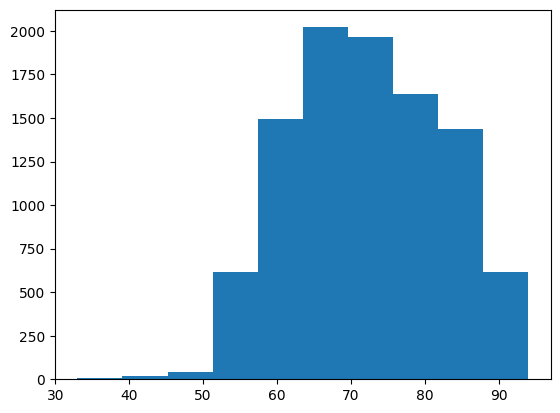

In [29]:
ax = plt.subplot()
plt.hist(df.ExternalRiskEstimate)
plt.title("Distribution of External Risk Estimate")
plt.show()
plt.clf()

In [34]:
#Distribution appears normal. Small amount of null_values could be imputed as mean/median
mean1 = np.mean(df['ExternalRiskEstimate'][df['ExternalRiskEstimate'] > 0])
df['ExternalRiskEstimate'].replace(-8, mean1, inplace= True)

/var/folders/13/lngr17tj6457_2v2xp487rc40000gn/T/ipykernel_57811/3124831465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExternalRiskEstimate'].replace(-8, mean1, inplace= True)
